<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Tensorflow/blob/main/Neural%20Network%20Classification%20with%20Tensorflow/Neural_Network_multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Classification

To practice multi-class classification we are going to build neural network to classify images of different items of clothing. We are going to use **fashion_mnist** dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Data is already sorted into training and testing dataset for us
(train_data,train_labels), (test_data,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
# Show the first training example
print(f"Training Sample:\n{train_data[0]}\n")
print(f"Test Sample:\n{train_labels[0]}\n")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

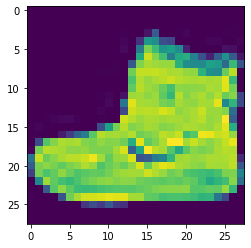

In [3]:
# Plot a single sample
plt.imshow(train_data[0])

In [4]:
# Check out samples labels
train_labels[0]

9

In [5]:
# Create a small list so we can index onto our training labels so they're human-readable 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Dress')

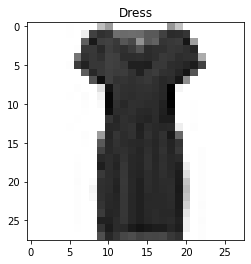

In [6]:
# Plot an example image and it's label
index_of_choice = 20
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

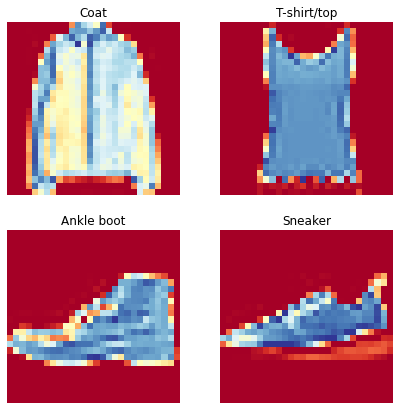

In [7]:
# Plot multiple random images od fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.RdYlBu)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Building multi-class classification

We are going to build same architecture as binary class classification. However we are going to tweak a few things:

1. Input Shape = 28 x 28 (the shape of one image)
2. Output Shape = 10( one per class of clothing)
3. Loss = tf.keras.losses.CategoricalCrossentropy()
4. Output Layer activation = Softmax

In [8]:
train_data[0].shape

(28, 28)

In [9]:
len(class_names)

10

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
 tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
 tf.keras.layers.Dense(4, activation="relu"),
 tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)                             
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
non_norm_history = model.fit(train_data, train_labels, epochs=10,
                             validation_data=(test_data, test_labels))

